In [1]:
# TORCH
import torch
import torch.nn as nn
# computational
import numpy as np 
import pandas as pd
# visual
import matplotlib.pyplot as plt
# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# dataset
from sklearn.datasets import load_breast_cancer

In [9]:
# load the dataset and process the data
X,Y = load_breast_cancer(return_X_y = True)
print(X.shape, Y.shape)

# now X and Y are numpy arrays, we need to split the data into train and test sets.
# Then I'll apply standardization to the features and reshape targets to have NxD where N is the number of the samples and D is the number of targets
# We don't need to reshape features since they're already in the shape of NxD
# And before training, we should convert numpy arrays to torch tensors in order to create and train the network

# First reshape the target because it'll be harder to do it later
Y = Y.reshape(-1,1)

# Then split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =.33)
print(X_train.shape, y_train.shape)

D1, D2 = X_train.shape[1], y_train.shape[1]

# Now scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert everything to pytorch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

(569, 30) (569,)
(381, 30) (381, 1)


In [10]:
# Initialize the model, select criterion and optimizer
model = nn.Linear(D1, D2) # we'll have D1=30 inputs and D2=1 outputs

criterion = nn.BCEWithLogitsLoss() # since we apply the BCE with logits, we don't need to apply sigmoid function seperately. It'll be applied in loss function.
optimizer = torch.optim.Adam(model.parameters(), lr = .01)

In [11]:
# Train the model (I'll copy this section from the other Linear Classification notebook I made.)

# Training phase
n_epochs = 200
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for i in range(n_epochs):
  # forward propagation
  train_outputs = model(X_train)
  train_loss = criterion(train_outputs, y_train)

  # backprop
  train_loss.backward()
  optimizer.step()
  optimizer.zero_grad()

    #

  # predict test data and calculate the loss
  test_outputs = model(X_test)
  test_loss = criterion(test_outputs, y_test)

  # keep the losses in order to plot them after training
  test_losses[i] = test_loss.item()
  train_losses[i] = train_loss.item()

  if ( (i+1) % 50 == 0):
    print(f"Epoch {i+1}/{n_epochs}, train_loss: {train_loss.item():.4f}, test_loss: {test_loss.item():.4f}")

Epoch 50/200, train_loss: 0.1467, test_loss: 0.1256
Epoch 100/200, train_loss: 0.1015, test_loss: 0.0970
Epoch 150/200, train_loss: 0.0835, test_loss: 0.0874
Epoch 200/200, train_loss: 0.0732, test_loss: 0.0829


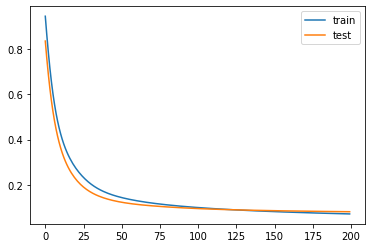

In [12]:
# plot the losses
plt.plot(train_losses, label = 'train')
plt.plot(test_losses, label = 'test')
plt.legend()
plt.show()

We already apply sigmoid to the function while training. So the results should be able to be classified by sigmoid function. Let's look at it's graph!


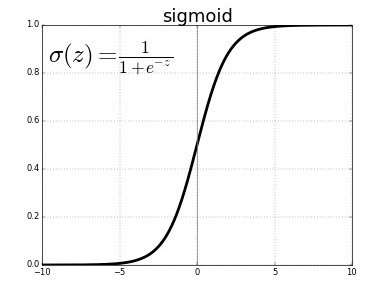


Recall that we apply sigmoid with the cost function! We get outputs from our model, then we apply sigmoid function while calculating cost. So model doesn't output the sigmoid applied results. In order to get our __predictions__, we should apply the sigmoid ourselves. Now  if x > 0, then we can say that number is closer to 1 (that makes it classified as 1), if x < 0, then we can say that number is closer to 0 (also this make it classified as 0)

In [18]:
# calculate accuracies
# since the model already applies sigmoid while training, there's no point of rounding the results. We should apply x>0 or x<0 condition to 
# have predictions. 
with torch.no_grad():
  train_predictions = model(X_train).numpy()
  train_predictions = ( train_predictions > 0)
  train_accuracy = (train_predictions == y_train.numpy()).sum() / train_predictions.shape[0]
  
  test_predictions = model(X_test).numpy()
  test_predictions = ( test_predictions > 0 )
  test_accuracy = (test_predictions == y_test.numpy()).sum() / test_predictions.shape[0]
  print(f"Prediction accuracy for train and training sets: %{train_accuracy * 100:.3f} | %{test_accuracy * 100:.3f}")

Prediction accuracy for train and training sets: %98.425 | %97.872
